# Linear Regression Model for California Housing Dataset

## Step 1.  Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import statsmodels.api as sm

In [3]:
california_housing_prices_url = "https://raw.githubusercontent.com/nyangweso-rodgers/data-analytics/refs/heads/main/01-datasets/01-california-housing-prices.csv"
# Load dataset
california_housing_prices_df = pd.read_csv(california_housing_prices_url)
california_housing_prices_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Step : Prepare the Data

In [4]:
X = california_housing_prices_df[['total_rooms']] # Predictor
y = california_housing_prices_df[['median_house_value']] # Target

## Step 4: Split the Data

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 5: Train the Model

In [6]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 6: Make Predictions

In [7]:
y_pred = model.predict(X_test)

## Step 7: Evaluate the Model

In [8]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 12868608472.627417
R² Score: 0.017970062300526446


## Step 8: Visualize the Results

### Step 8.1: Visualize the Regression Line with the Data Points

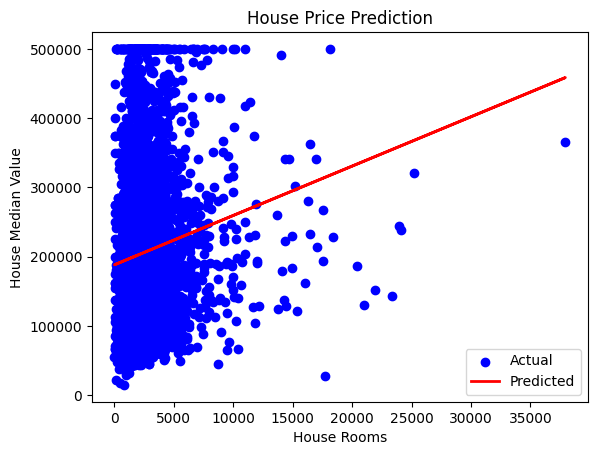

In [9]:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.xlabel('House Rooms')
plt.ylabel('House Median Value')
plt.title('House Price Prediction')
plt.legend()
plt.show()

# Step :Model Diagnostics
- After building and evaluating our linear regression model, it's crucial to diagnose its performance further to ensure its reliability and validity.

## 1. Residual Analysis
- __Residuals__ are the differences between the observed and predicted values. Analyzing residuals helps us check for patterns that our model might have missed.

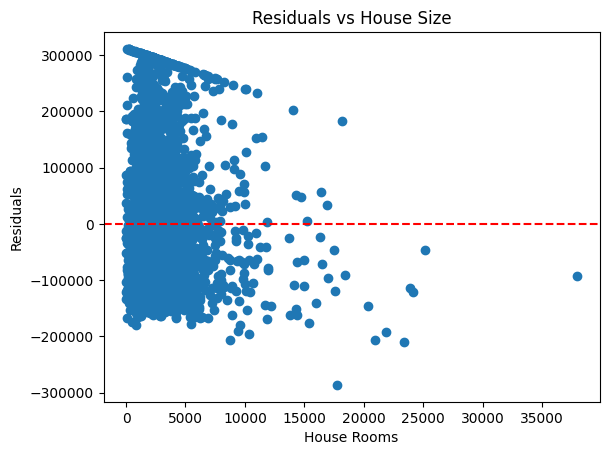

In [10]:
residuals = y_test - y_pred
plt.scatter(X_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('House Rooms')
plt.ylabel('Residuals')
plt.title('Residuals vs House Size')
plt.show()

## 2. Distribution of Residuals
- We expect the residuals to be normally distributed. Let's plot the distribution of residuals.

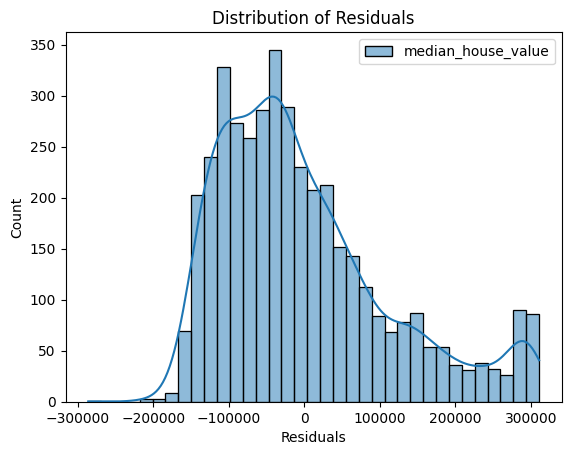

In [11]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

## 3. Q-Q Plot
- A Q-Q plot helps us check if the residuals are normally distributed.

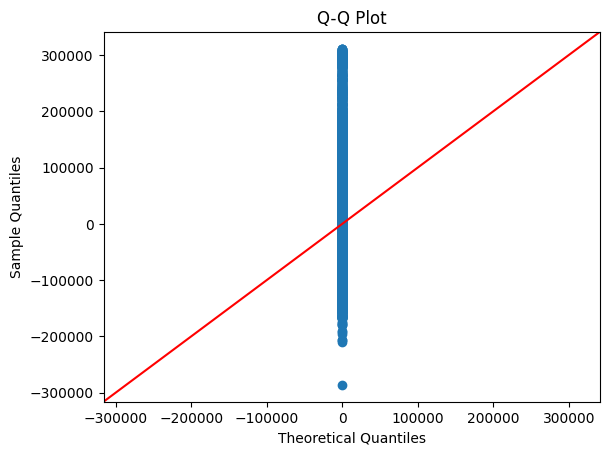

In [12]:
sm.qqplot(residuals, line='45')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot')
plt.show()

## 4. Homoscedasticity
- __Homoscedasticity__ means that the variance of residuals should be constant across all levels of the independent variable. We can check this by plotting residuals against the predicted values.

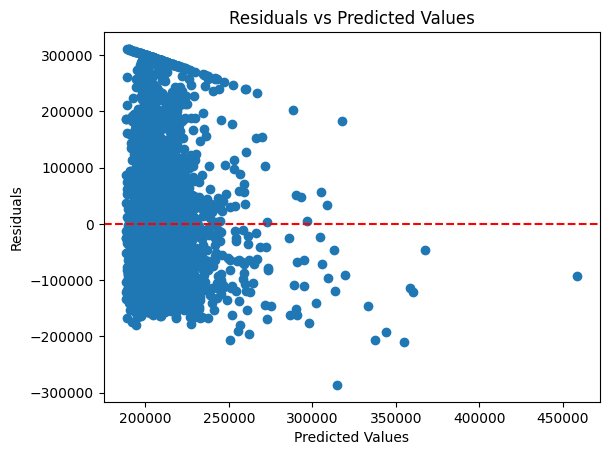

In [13]:
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

__Remarks__
1. Performing model diagnostics is essential to ensure your model is valid and reliable. Residual analysis, checking the distribution of residuals, Q-Q plots, and testing for homoscedasticity are crucial steps in validating your model.